In [23]:
# Ignore Warnings 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries 
import pandas as pd
import numpy as np 
import os 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , Dropout , Flatten , MaxPooling2D 

In [ ]:
# Define Direcotories of the images folder 
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation/'

In [ ]:
# Function for reading images path and labels 
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir , label)):
            image_paths.append(os.path.join(dir , label , imagename))
            labels.append(label)

        print(label, "comapleted")
    return  image_paths , labels

In [ ]:
# Create Train DataFrame
train = pd.DataFrame()
train["image"] , train["label"] = createdataframe(TRAIN_DIR)

angry comapleted
disgust comapleted
fear comapleted
happy comapleted
neutral comapleted
sad comapleted
surprise comapleted


In [ ]:
# Create Test DataFrame
test = pd.DataFrame()
test['image'] , test['label'] = createdataframe(TEST_DIR)

angry comapleted
disgust comapleted
fear comapleted
happy comapleted
neutral comapleted
sad comapleted
surprise comapleted


In [20]:
# Shape of Train and Test dataset
print(f"Rows in Train -: {train.shape[0]}  Cols in Train {train.shape[1]}" )
print(f"Rows in test -: {test.shape[0]}  Cols in test {test.shape[1]}" )

Rows in Train -: 28821  Cols in Train 2
Rows in test -: 7066  Cols in test 2


In [21]:
# Import tqdm for faster iterations (LOOPS)
from tqdm.notebook import tqdm

In [25]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image , color_mode = "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features) , 48 , 48 , 1)
    return features

In [26]:
train_features = extract_features(train["image"])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [27]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [28]:
x_train = train_features / 255.0
X_test = test_features / 255.0

In [29]:
# Encode the labels 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [30]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [31]:
y_train = to_categorical(y_train , num_classes = 7)
y_test = to_categorical(y_test , num_classes = 7)

In [32]:
# Create a model 
model = Sequential()
# Convets 
model.add(Conv2D(128 , kernel_size=(3,3) , activation = 'relu' , input_shape = (48 , 48 ,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))


# Output Layer
model.add(Dense(7 , activation = "softmax"))

In [34]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,
 metrics=['accuracy', 'precision', 'recall']
 )

In [37]:
historys = model.fit(x_train , y_train , batch_size = 128 , epochs = 5 , validation_data = (X_test , y_test))

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.2458 - loss: 1.8152 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2604 - val_loss: 1.7823 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.2859 - loss: 1.7330 - precision: 0.6082 - recall: 0.0202 - val_accuracy: 0.3725 - val_loss: 1.6011 - val_precision: 0.7978 - val_recall: 0.0810
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.4052 - loss: 1.5171 - precision: 0.7177 - recall: 0.1598 - val_accuracy: 0.4605 - val_loss: 1.3972 - val_precision: 0.8148 - val_recall: 0.1874
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.4655 - loss: 1.3887 - precision: 0.7326 - recall: 0.2232 - val_accuracy: 0.4877 - val_loss: 1.3168 - val_precision: 0.7485 - val_recall: 0.2852
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.4980 - loss: 1.3177 - precision: 0.7384 - recall: 0.2620 - val_accuracy: 0.533

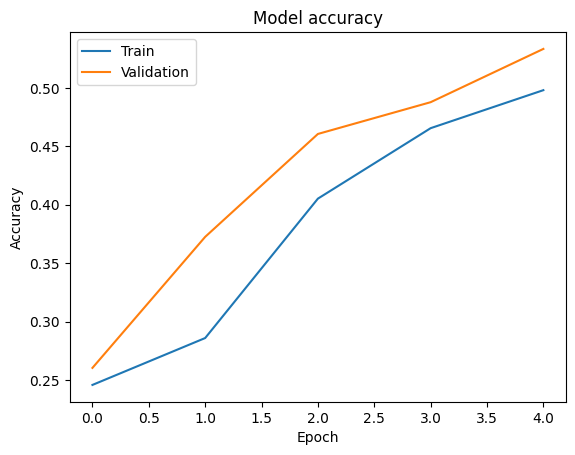

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(historys.history['accuracy'])
plt.plot(historys.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


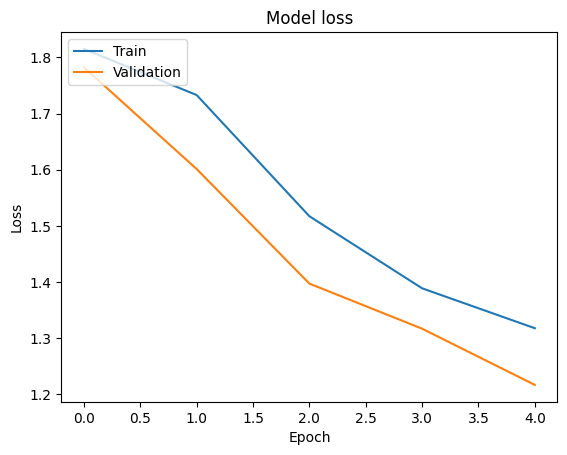

In [39]:

# Plot training & validation loss values
plt.plot(historys.history['loss'])
plt.plot(historys.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [42]:
from keras.models import model_from_json

In [44]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [45]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [48]:
def ef(image):
    img = load_img(image, color_mode = "grayscale"  )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [ ]:
image = 'images/train/sad/43.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)